<a href="https://colab.research.google.com/github/Narae-210/class2021Spring/blob/main/sound_in_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import IPython.display as ipd
import numpy as np
from scipy.signal import lfilter

# **Phasor**

x축이 time이고 y축이 값들.
2차원뿐만 아니라 3차원 상의 phasor도 만들 것임! (3차원에서는 복소수의 개념도 들어감)

In [6]:
# parameter setting
amp = 1          # range [0.0, 1.0]  @@ amplitude는 진폭!, 0을 기준으로 얼마나 위 아래로 가느냐! ; 1~=1
sr = 10000       # sampling rate, Hz @@ 1초동안  몇개의 sample을 추출할 것이냐! ; 1초에 10000개 설정!
dur = 0.5        # in seconds @@ 한 진동의 시간
freq = 100.0     # sine frequency, Hz @@ "반복이 되는 하나의 그거!": cycle, 1초에 반복되는 unit이 몇개니! ; 얘는 1초에 100번 반복

#sr이랑 freq을 구분하세요~!~~ frep은 반복되는 게 몇개 있느냐고 sr은 1초동안 (.쩜들을!) 몇개를 추출할건지.

In [7]:
# generate time
# @@ 시간을 만드는 작업!!!-왜냐면 원래 우리가 배운 sin에는 시간 개념이 안 들어가있기 때무니다.

t = np.arange(1, sr * dur+1)/sr

sr 너무너무너무 중요함!!! 1초 동안 쩜들이 몇 개 들어가있는지, 즉 몇 초를 만들건지! 의미하기 때문임. 

(시간을 얼마나 잘게 쪼갤것인지)

@ 그냥 dur =1 이라고 생각하면 np.arange(1,10001)이므로 1 부터 10000까지 만드는 것임

dur = 0.5면 5000까지 만드는 거고~!

@ 거기에 sr = 10000 로 나누어 주면 (왜? 나누어야 '초'가 되니까!)

1/10000, 2/10000,... 10000/100000 이런식으로 됨! 물론 얘는 5천이지마는 ~ +_+ (아 미친 얘도 오천 아니네!!!! sr로 나눈거니까 그냥 만이네) **그리고 끝이 만이 아니라 오천인것임**

근데 시간만 있으면 sine wave에 못 써먹기 때문에 그거랑 연결이 된 phase랑 sync시켜야 한다는 것 같음.

In [8]:
# generate phase
theta = t * 2*np.pi * freq   

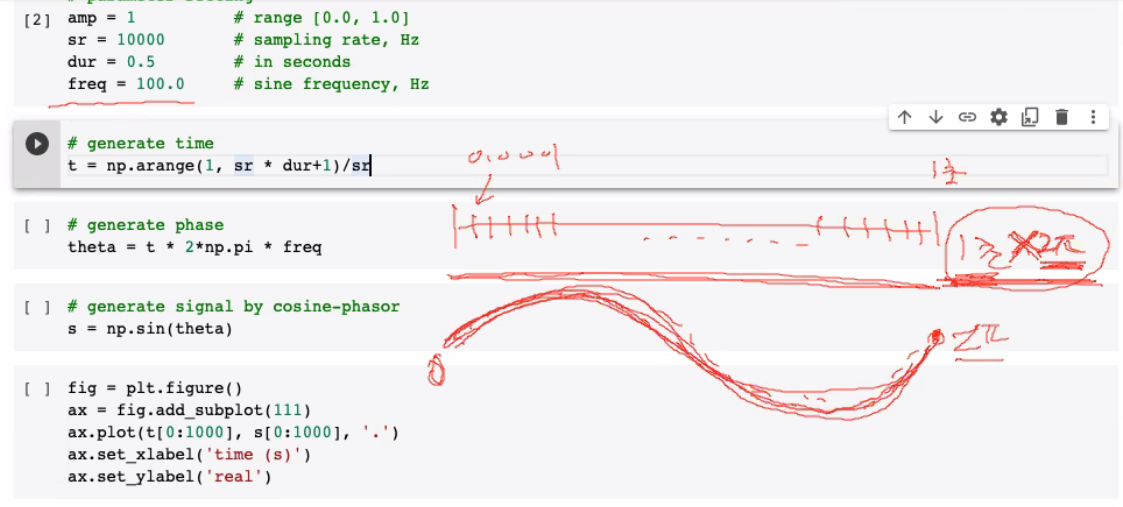

근데 이 위에 사진은 1바퀴임!!!! 2파이 짜리 1바퀴!!

근데 freq가 100이니까 100번 돌아야함.

그래서 **초, 파이, n바퀴를 곱해야함!**!!!! 초, 파이만 곱하면 그냥 1바퀴 짜릐니까.

time이랑 phase를 sync 시키는 작업도 완전 필요하고 중요함!!!!!!

In [9]:
# generate signal by cosine-phasor
# @@ sin 함수에 theta 각도 값(radian;여기서는 세타로 가정)을 넣음.; 2파이면 360, 파이면 180! 그니까 파이 형태로 넣어야함.
s = np.sin(theta)

Text(0, 0.5, 'real')

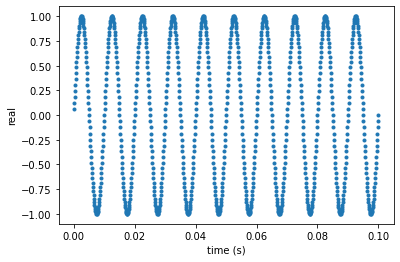

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(t[0:1000], s[0:1000], '.')
# x 에 들어올 값들~ y 에 들어올 값들~ ; x축은 phase 각도 값아님!!!!!!!! time이다ㅡㅡ
# 그러고 y축에 아까 만들어둔 sine을 넣으면 됨.
ax.set_xlabel('time (s)')
ax.set_ylabel('real')

t의 샘플 개수는 몇개야? 1000개만 한것임! 하지만 전부 다 해주면 "5000"개!!!!!!!

1초로 해주면 "10000"개가 찍힘.

Text(0, 0.5, 'real')

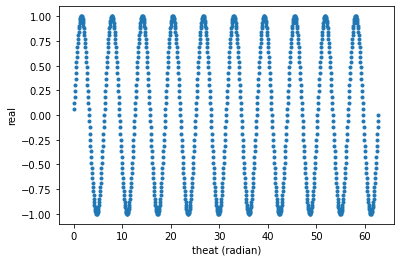

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(theta[0:1000], s[0:1000], '.')
ax.set_xlabel('theat (radian)')
ax.set_ylabel('real')
#위에랑 똑같은데 x축이 다르죠~!!%_%

In [13]:
ipd.Audio(s, rate=sr)

In [ ]:
# generate signal by complex-phasor
c = np.exp(theta*1j)

In [ ]:
fig = plt.figure()
ax = plt.subplot(111, projection='3d')
ax.plot(t[0:1000], c.real[0:1000], c.imag[0:1000], '.')
ax.set_xlabel('time (s)')
ax.set_ylabel('real')
ax.set_zlabel('imag')

In [ ]:
import plotly.graph_objects as go
import numpy as np

x, y, z = t[0:1000], c.real[0:1000], c.imag[0:1000]
fig = go.Figure(data=[go.Scatter3d(x=x, y=y, z=z,
                                   mode='markers',
                                   marker=dict(size=3))])
fig.show()

In [ ]:
ipd.Audio(s, rate=sr)

**Generate pulse train**